In [184]:
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore")
load_dotenv('../.env')

True

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
pd.set_option('display.max_columns', None)

In [187]:
data = pd.read_csv('../data/trainingSet.csv')
display(data.shape)
data.head()

(311106, 40)

,index,eventType,period,periodTime,periodType,gameID,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,goalie,shotType,emptyNet,strength,season,rinkSide,gameType,totalPlayTime,lastEventType,lastEventPeriod,lastEventPeriodTime,lastEventXCoord,lastEventYCoord,Goal,EmptyNet,distanceFromNet,angle,gameSeconds,lastEventGameSeconds,timeFromLastEvent,distanceFromLastEvent,rebound,lastEventAngle,changeInAngleShot,speed,timeSincePowerPlayStarted,numFriendlyNonGoalieSkaters,numOpposingNonGoalieSkaters,strength2
0,0,Shot,1,00:51,REGULAR,2015020001,Toronto Maple Leafs,home,-55.0,6.0,Brad Boyes,Carey Price,Wrist Shot,NaN,NaN,2015,right,R,01:00:00,Hit,1,00:40,94.0,-34.0,0.0,0.0,34.525353,79.992020,51.0,40.0,11.0,154.275727,0.0,NaN,NaN,14.025066,0.0,5.0,5.0,Even
1,1,Shot,1,01:05,REGULAR,2015020001,Toronto Maple Leafs,home,-79.0,0.0,Nazem Kadri,Carey Price,Snap Shot,NaN,NaN,2015,right,R,01:00:00,Giveaway,1,00:58,-37.0,-28.0,0.0,0.0,10.000000,90.000000,65.0,58.0,7.0,50.477718,0.0,NaN,NaN,7.211103,0.0,5.0,5.0,Even
2,2,Shot,1,01:06,REGULAR,2015020001,Toronto Maple Leafs,home,-75.0,-1.0,Nazem Kadri,Carey Price,Snap Shot,NaN,NaN,2015,right,R,01:00:00,Shot,1,01:05,-79.0,0.0,0.0,0.0,14.035669,94.085617,66.0,65.0,1.0,4.123106,1.0,NaN,NaN,4.123106,0.0,5.0,5.0,Even
3,3,Shot,1,01:53,REGULAR,2015020001,Toronto Maple Leafs,home,-55.0,-36.0,Daniel Winnik,Carey Price,Wrist Shot,NaN,NaN,2015,right,R,01:00:00,Hit,1,01:35,-91.0,35.0,0.0,0.0,49.517674,136.636577,113.0,95.0,18.0,79.605276,0.0,NaN,NaN,4.422515,0.0,5.0,5.0,Even
4,4,Shot,1,02:37,REGULAR,2015020001,Toronto Maple Leafs,home,-61.0,-1.0,Joffrey Lupul,Carey Price,Tip-In,NaN,NaN,2015,right,R,01:00:00,Faceoff,1,02:32,-69.0,-22.0,0.0,0.0,28.017851,92.045408,157.0,152.0,5.0,22.472205,0.0,NaN,NaN,4.494441,0.0,5.0,5.0,Even


In [188]:
# Read and preprocess data
df = data[['distanceFromNet', 'angle', 'EmptyNet', 'Goal']]
df = df.rename({'Goal': 'is_goal', 'distanceFromNet': 'distance'}, axis=1)
df = df.dropna().reset_index(drop=True)
df['is_goal'] = df['is_goal'].astype(np.int64)
display(df.shape)
df.head()

(311086, 4)

,distance,angle,EmptyNet,is_goal
0,34.525353,79.992020,0.0,0
1,10.000000,90.000000,0.0,0
2,14.035669,94.085617,0.0,0
3,49.517674,136.636577,0.0,0
4,28.017851,92.045408,0.0,0


### Question-1: plots

In [189]:
df_goals = df[df['is_goal']==1]
df_nongoals = df[df['is_goal']==0]

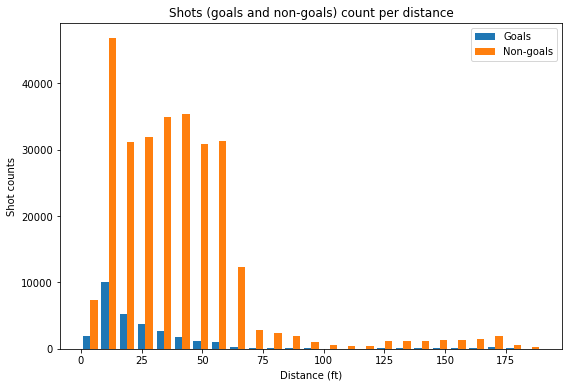

In [190]:
goals_distance = df_goals['distance'].to_numpy()
nongoals_distance = df_nongoals['distance'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_distance, nongoals_distance], bins=25, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Distance (ft)')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per distance')
plt.savefig('../figures/2-shots-per-distance.png')
plt.show()

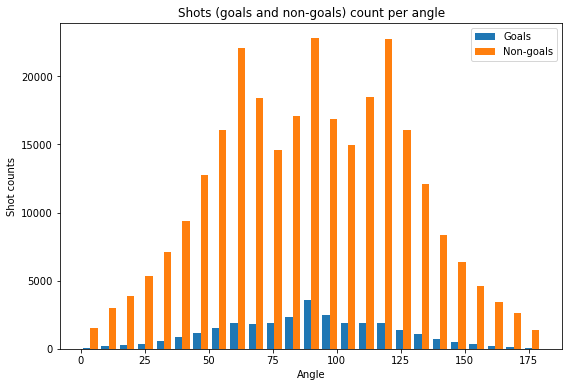

In [191]:
goals_angle = df_goals['angle'].to_numpy()
nongoals_angle = df_nongoals['angle'].to_numpy()

plt.figure(figsize=(9, 6))
plt.hist([goals_angle, nongoals_angle], bins=25, label=['Goals', 'Non-goals'])
plt.ylabel('Shot counts')
plt.xlabel('Angle')
plt.legend(loc='upper right')
plt.title('Shots (goals and non-goals) count per angle')
plt.savefig('../figures/2-shots-per-angle.png')
plt.show()

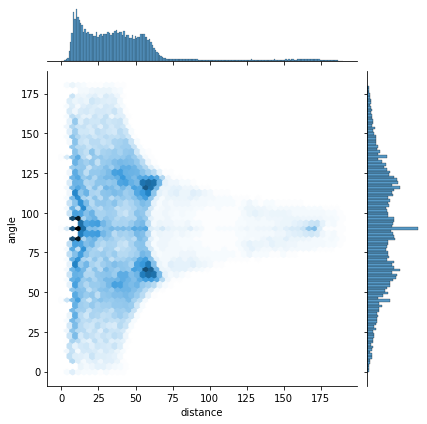

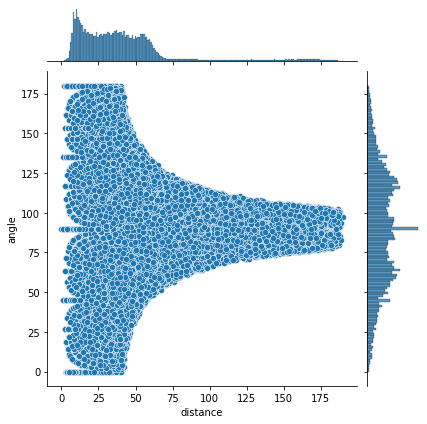

In [192]:
# option 1
sns.jointplot(data=df, x="distance", y="angle", bins=100, kind='hex')
plt.savefig('../figures/2-shots-per-distance-angle-1.png')
plt.show()

# option 2
sns.jointplot(data=df, x="distance", y="angle")
plt.savefig('../figures/2-shots-per-distance-angle-2.png')
plt.show()

### Question-2

In [193]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['distance1ft'] = df_goal_rate_per_distance['distance'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('distance1ft')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,distance1ft,goal_rate
0,0.0,1.000000
1,1.0,0.785714
2,2.0,0.523810
3,3.0,0.400000
4,4.0,0.315133


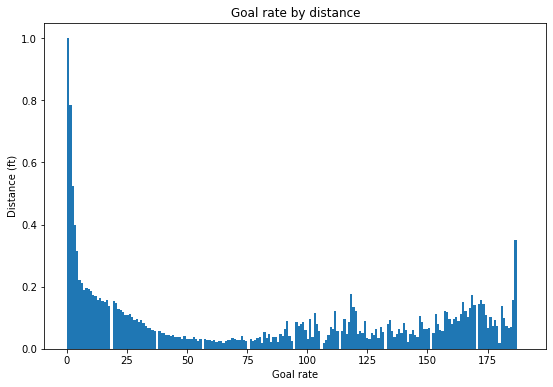

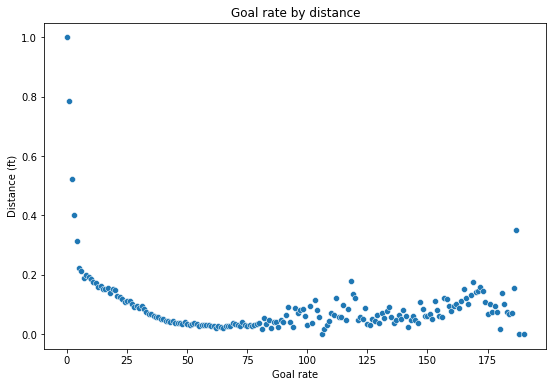

In [194]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['distance1ft'], weights=df_goal_rate_per_distance['goal_rate'], bins=200)
plt.title('Goal rate by distance')
plt.xlabel('Goal rate')
plt.ylabel('Distance (ft)')
plt.savefig('../figures/2-goals-rate-distance-1.png')
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="distance1ft", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Goal rate by distance')
plt.xlabel('Goal rate')
plt.ylabel('Distance (ft)')
plt.savefig('../figures/2-goals-rate-distance-2.png')
plt.show()

In [195]:
df_goal_rate_per_distance = df.copy()
df_goal_rate_per_distance['angle1deg'] = df_goal_rate_per_distance['angle'].round() 
df_goal_rate_per_distance = df_goal_rate_per_distance.groupby('angle1deg')['is_goal'].mean().reset_index(name='goal_rate')
display(df_goal_rate_per_distance.head())

,angle1deg,goal_rate
0,0.0,0.077966
1,1.0,0.000000
2,2.0,0.024590
3,3.0,0.064103
4,4.0,0.063927


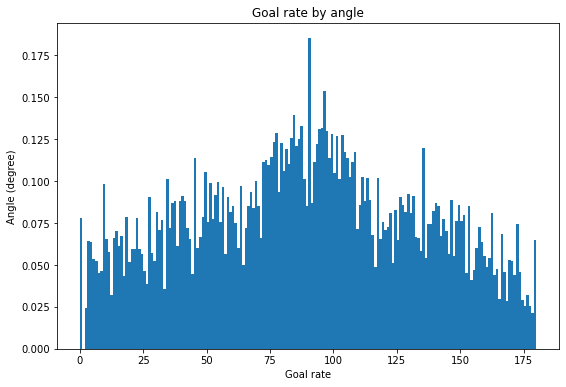

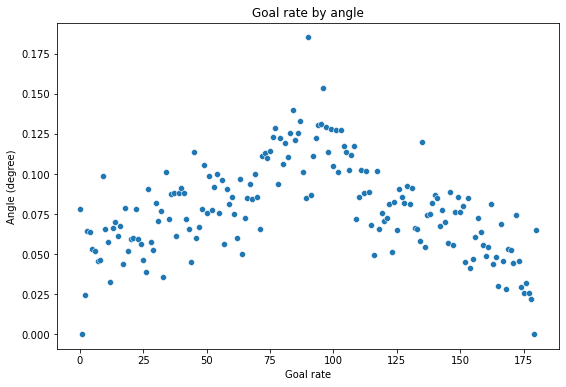

In [196]:
#option 1
plt.figure(figsize=(9, 6))
plt.hist(df_goal_rate_per_distance['angle1deg'], weights=df_goal_rate_per_distance['goal_rate'], bins=180)
plt.title('Goal rate by angle')
plt.xlabel('Goal rate')
plt.ylabel('Angle (degree)')
plt.savefig('../figures/2-goals-rate-angle-1.png')
plt.show()

# option 2
plt.figure(figsize=(9, 6))
sns.scatterplot(x="angle1deg", y="goal_rate", data=df_goal_rate_per_distance, palette="muted")
plt.title('Goal rate by angle')
plt.xlabel('Goal rate')
plt.ylabel('Angle (degree)')
plt.savefig('../figures/2-goals-rate-angle-2.png')
plt.show()

### Question-3

In [197]:
df_dist_net_goals = df_goals[['distance', 'EmptyNet']]

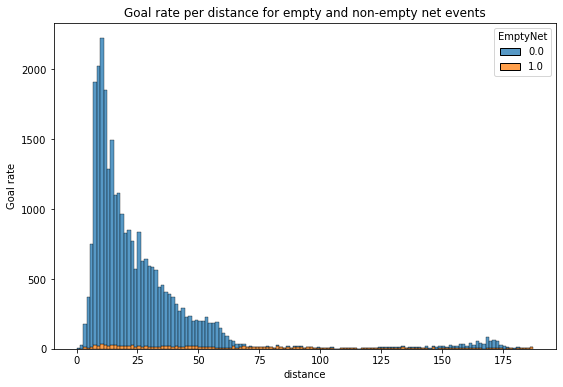

In [198]:
plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals, x="distance", hue="EmptyNet", multiple="stack")
plt.title('Goal rate per distance for empty and non-empty net events')
plt.ylabel('Goal rate')
plt.xlabel('distance')

plt.savefig('../figures/2-goals-distance-net.png')

plt.show()

#### Identify an event with incorrect features

**Idea:** A goal scored from a long distance (e.g., 180m) is possible if the net is empty but it is rare to have a goal from that distance while the net is not empty and in that case, it is high probable to be an anomaly (i.e., incorrect features).

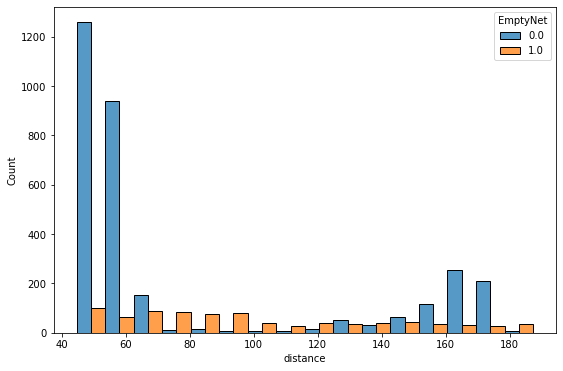

In [199]:
df_dist_net_goals2 = df_dist_net_goals.sort_values('distance', ascending=False)[:4000]

plt.figure(figsize=(9, 6))

sns.histplot(data=df_dist_net_goals2, x="distance", hue="EmptyNet", multiple="dodge")

plt.show()

In [200]:
df_suspecious = df_dist_net_goals2[df_dist_net_goals2['EmptyNet']==0]
df_suspecious.head()

,distance,EmptyNet
104733,187.181730,0.0
4192,186.131674,0.0
9678,183.847763,0.0
22721,182.101620,0.0
15507,181.276033,0.0


In [201]:
suspicious_event = df_suspecious.iloc[0]
data[(data['distanceFromNet']==suspicious_event['distance']) & (data['eventType']=='Goal')]

,index,eventType,period,periodTime,periodType,gameID,teamOfShooter,homeOrAway,xCoord,yCoord,shooter,goalie,shotType,emptyNet,strength,season,rinkSide,gameType,totalPlayTime,lastEventType,lastEventPeriod,lastEventPeriodTime,lastEventXCoord,lastEventYCoord,Goal,EmptyNet,distanceFromNet,angle,gameSeconds,lastEventGameSeconds,timeFromLastEvent,distanceFromLastEvent,rebound,lastEventAngle,changeInAngleShot,speed,timeSincePowerPlayStarted,numFriendlyNonGoalieSkaters,numOpposingNonGoalieSkaters,strength2
104738,32,Goal,2,10:27,REGULAR,2016020510,Florida Panthers,home,-97.0,21.0,Derek MacKenzie,Jared Coreau,Slap Shot,False,Even,2016,left,R,01:05:00,Blocked Shot,2,10:23,54.0,-8.0,1.0,0.0,187.18173,96.4416,1827.0,1823.0,4.0,153.759553,0.0,NaN,NaN,38.439888,0.0,5.0,5.0,Even
